In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (16,10)

## Visualization

I'm not an expert on visualization and it is a huge topic, so I'm only going to cover enough of the basics for the examples in this repository. I'll be using a system called [matplotlib](https://matplotlib.org/), it isn't particularly exciting, but it is fairly flexible and very widely used. With a little coersion, you can usually get it to do what you need for publications etc.

### Matplotlib

Matplotlib is the defacto standard for visualization in python. It has been around for a long time, and it benefits from a large userbase, good documentation, [tutorials](https://matplotlib.org/stable/tutorials/index.html) and lots of easily copied examples! It is commonly imported with `import matplotlib.pyplot as plt` and `plt` is the state-based interface to matplotlib. If you've ever plotted in MATLAB it should be fairly familiar (actually, I think that's where the MAT in matplotlib comes from).

Matplotlib is portable across systems. For this to work it uses the concept of "backends" which do the actual rendering of figures. These backends vary by operating system and other factors and all you need to do is tell matplotlib which one you would like to use. For the notebook interface there is a special magic command called `%matplotlib` which will do this for us. Most backends are hooks into specific windowing libraries or other utilities, but `inline` is a special backend which lets you display the results directly in the notebook.
 
  * [altair](https://altair-viz.github.io/)
  * [plotly](https://plot.ly/python/ipython-notebook-tutorial/)
  * [d3](https://d3js.org/)
  
Matplotlib actually has two interfaces for plotting, one is a more traditional stateful interace and the other takes an object oriented approach. We'll stick to the second one because while it is a little bit more verbose, it is more flexible and widely used. If you are looking at examples, you can normally tell which one they are using by checking to see if the call `plt.plot` or `ax.plot`. The OO interface gives you explicit figure and axes objects to attach things to so it doesn't depend as strongly on current cell context (this is useful if you want to modify more than one plot)

### Basic Plotting

We'll start with a line plot.

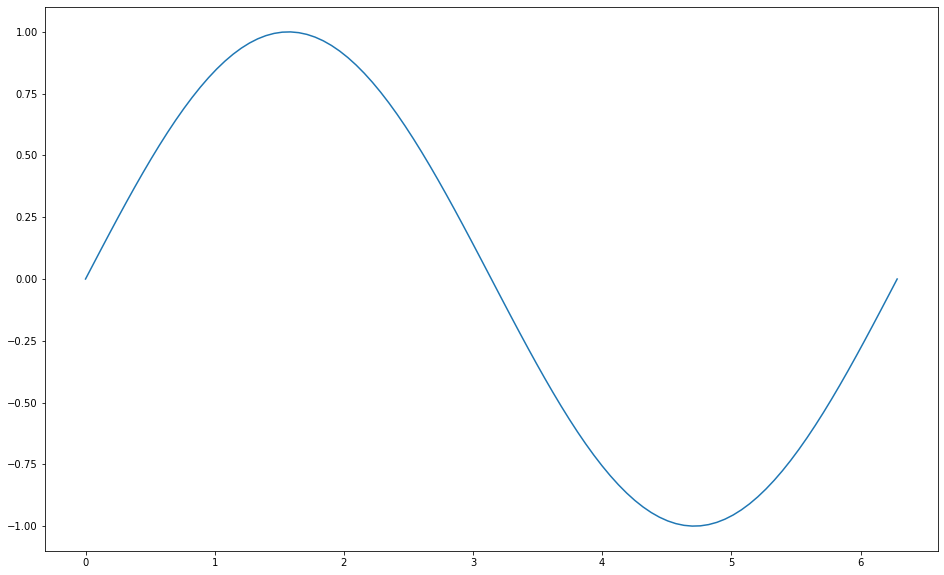

In [3]:
x = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x))

The second line calls the subplots function with an argument of 1. If you look at the documentation for that function, it says that this should give is a single figure (canvas) and one set of axes. Later on, we will add other values to make more complicated plots.

Within a single axes object we can plot multiple things, this will overlay the plots

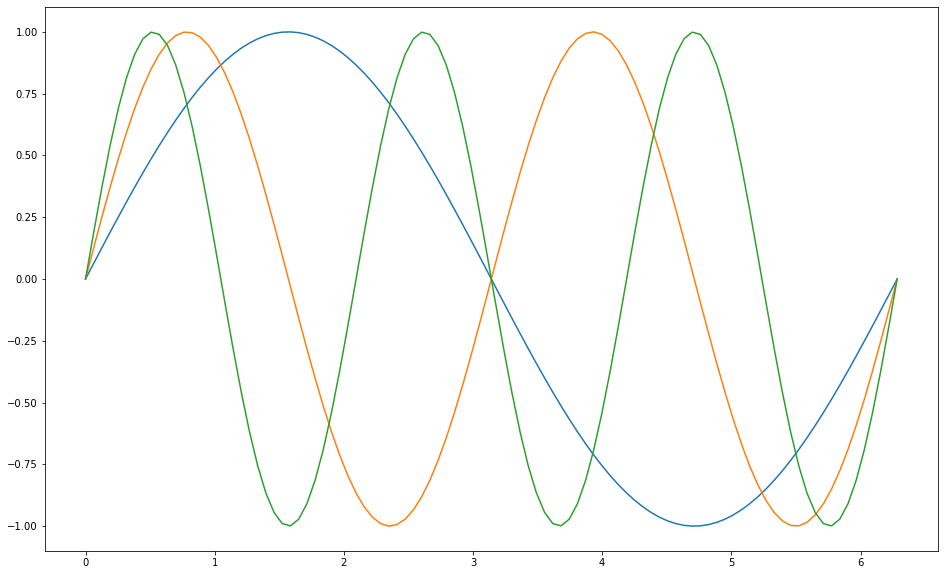

In [4]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same plot
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(3*x))

`plot` takes a huge selection of [keyword arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). We can change line widths, colors, types, add  labels etc.

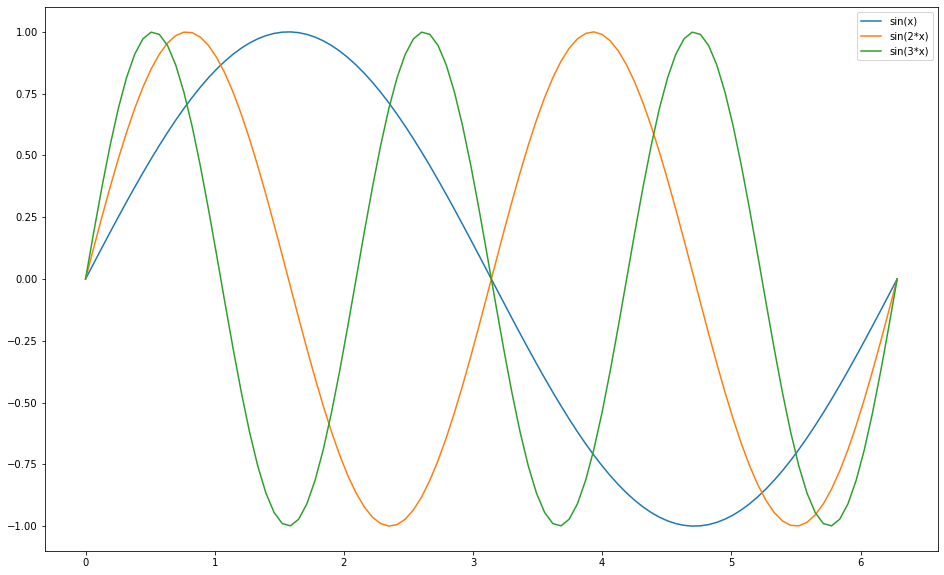

In [5]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same plot with `label=` for each and add a lagend to the axis
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.sin(2*x), label='sin(2*x)')
ax.plot(x, np.sin(3*x), label='sin(3*x)')
ax.legend()

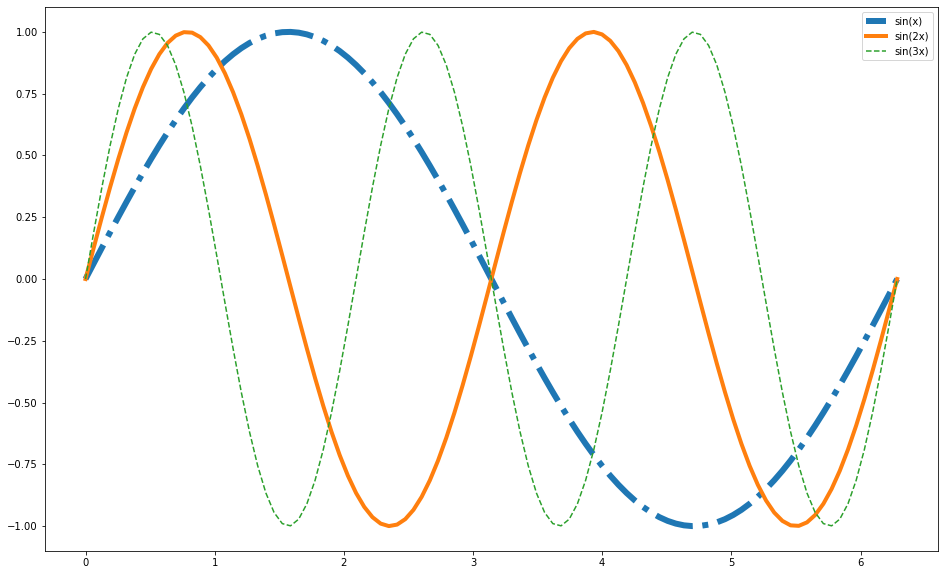

In [7]:
# Plot sin(x), sin(2*x) and sin(3*x) on the same figure with labels and different `linetype` and `linewidth` values
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x), label='sin(x)', linewidth=6, linestyle='-.')
ax.plot(x, np.sin(2*x), label='sin(2x)', linewidth=4)
ax.plot(x, np.sin(3*x), label='sin(3x)', linestyle='--')
ax.legend()


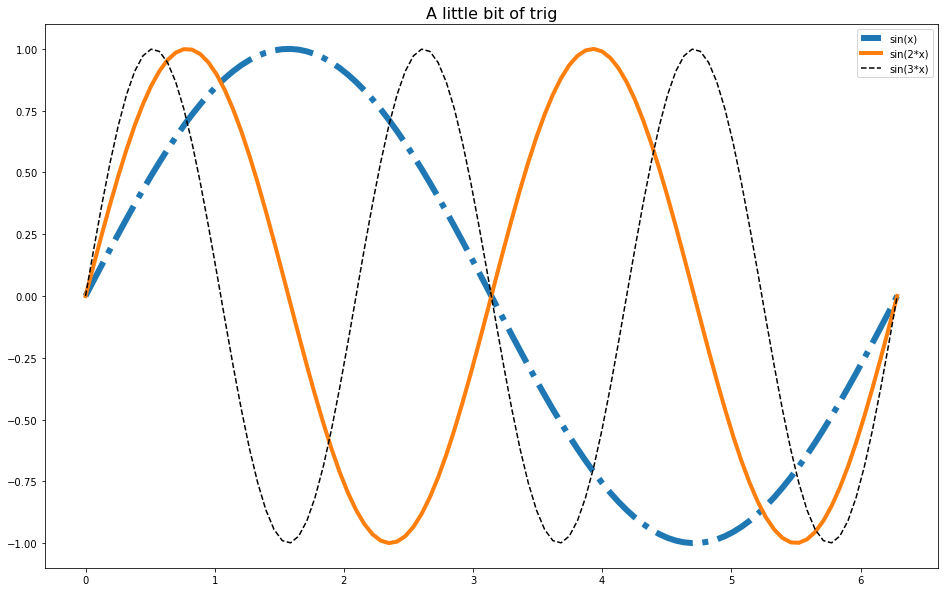

In [8]:
# Same plot, but set a title on the axis, use the fontdict to change the fontsize
# fontdict={'fontsize': 16}
fig, ax = plt.subplots(1)
ax.set_title('A little bit of trig', fontdict={'fontsize': 16})
ax.plot(x, np.sin(x), label='sin(x)', linewidth=6, linestyle='-.')
ax.plot(x, np.sin(2*x), label='sin(2*x)', linewidth=4)
ax.plot(x, np.sin(3*x), label='sin(3*x)', linestyle='--', color='black')
ax.legend()


There are lots of ways to [specify color](https://matplotlib.org/stable/tutorials/colors/colors.html).

**Exercise**: You can modify the scale of each axis, the tick positions, lables etc. Via the `ax.set_` methods. Take a look at the documentation then , tic position almost everything via the axes, take a look at `ax.set<TAB>` and add lables for the `x` and `y` axes.

## Scatter plots

axes have lots convenience methods for lots of different types of plots. One of these is the scatter plot. Take a look at the help for `plt.scatter`

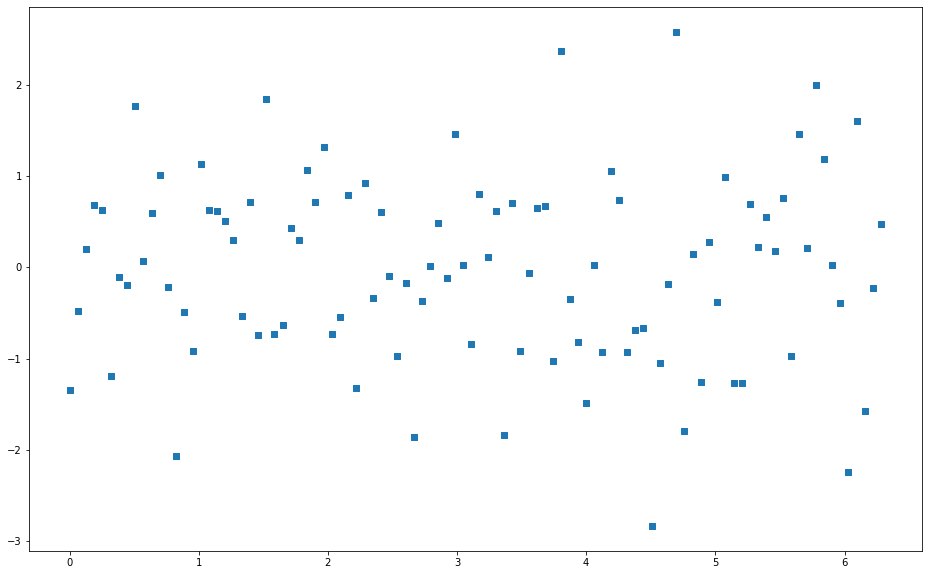

In [9]:
# Create a scatter plot of x vs np.random.randn(len(x) with `marker='s'`)
fig, ax = plt.subplots(1)
ax.scatter(x, np.random.randn(len(x)), marker='s')

One interesting variation is to use colors and marker size to encode more information. You can control the size of the markers with the `size=` keyword. In the example below `alpha` sets a transparency and c sets colors. Take a look at the help to understand the types of these arguments

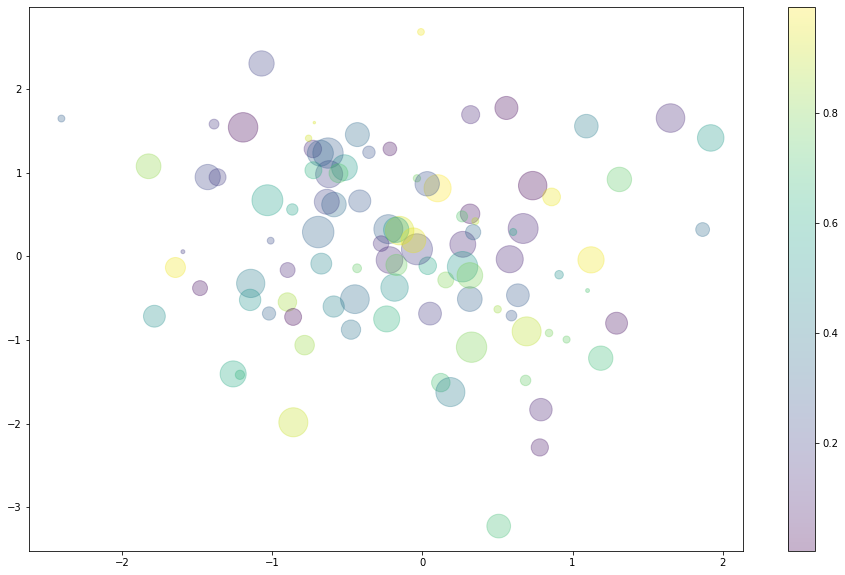

In [10]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)

fig, ax = plt.subplots(1)
s = ax.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
fig.colorbar(s, ax = ax)

### Errorbar Plots

Everything should have error bars! Matplotlib has a special plotting utility to make showing them easy

<ErrorbarContainer object of 3 artists>

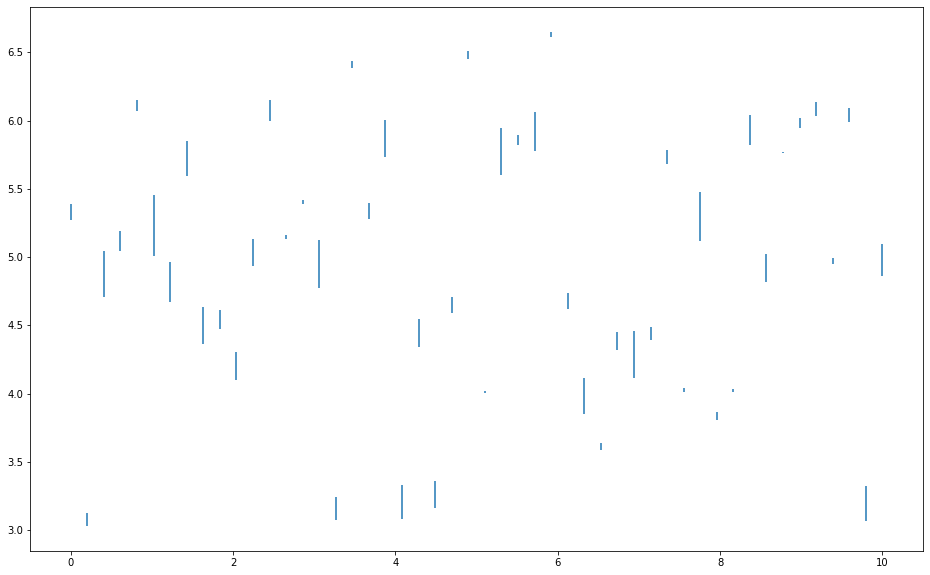

In [11]:
x = np.linspace(0, 10, 50)
y = 5 + np.random.randn(50)
yerr = 0.1 * np.random.randn(50)

fig, ax = plt.subplots(1)
ax.errorbar(x, y, yerr=yerr, linestyle='None')

The default size for the error bar caps is too small, let's tweak this

<ErrorbarContainer object of 3 artists>

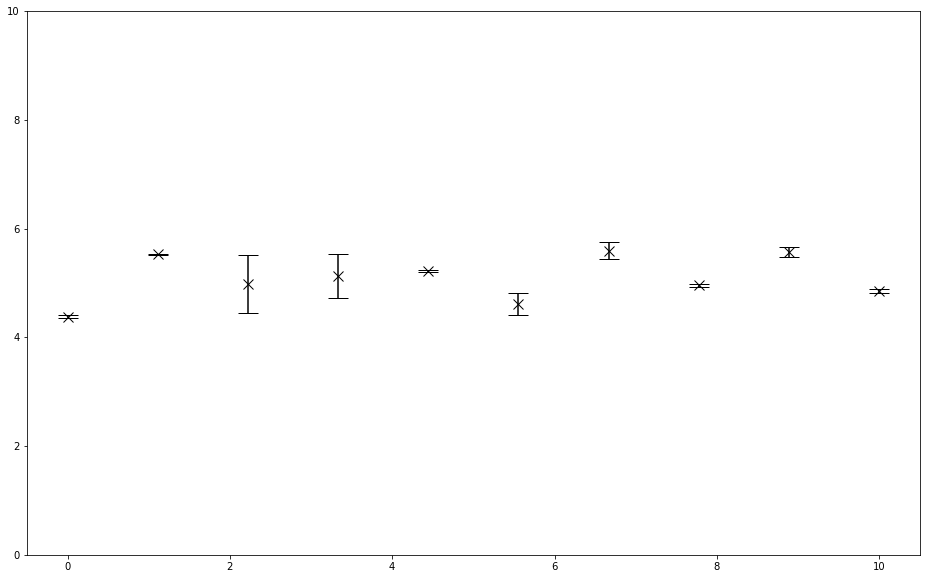

In [12]:
x = np.linspace(0, 10, 10)
y = 5 + 0.5 * np.random.randn(10)
yerr = 0.3 * np.random.randn(10)

fig, ax = plt.subplots(1)

# Set the ylim to (0,10) and change the capsize, markersize, ecolor etc.
ax.set_ylim(0, 10)
ax.errorbar(
    x, 
    y, 
    yerr, 
    linestyle='None', 
    color='black', 
    capsize=10, 
    markersize=10, 
    marker='x'
)

### Barplots/Histograms

Histograms are useful for taking a quick look at how data is distributed. The default call will auto set a range and put things into one of 10 bins across that range. The histogram function not only plots your data but it will return 3 objects

  * **n**: The number of items in each bin, as an `ndarray`
  * **bins**: The edge locations of the bins, as an `ndarray`
  * **patches**: A list of patches used by matplotlib to render the bins

In [ ]:
# Show a histogram of `np.random.randn(1000)`

fig, ax = plt.subplots()
ax.hist(np.random.randn(1000))

This is really handy for basic exploration, and you can tweak the bin sizes etc. as needed. In addition to the plots, you also get back a tuple with the bin counts and locations 

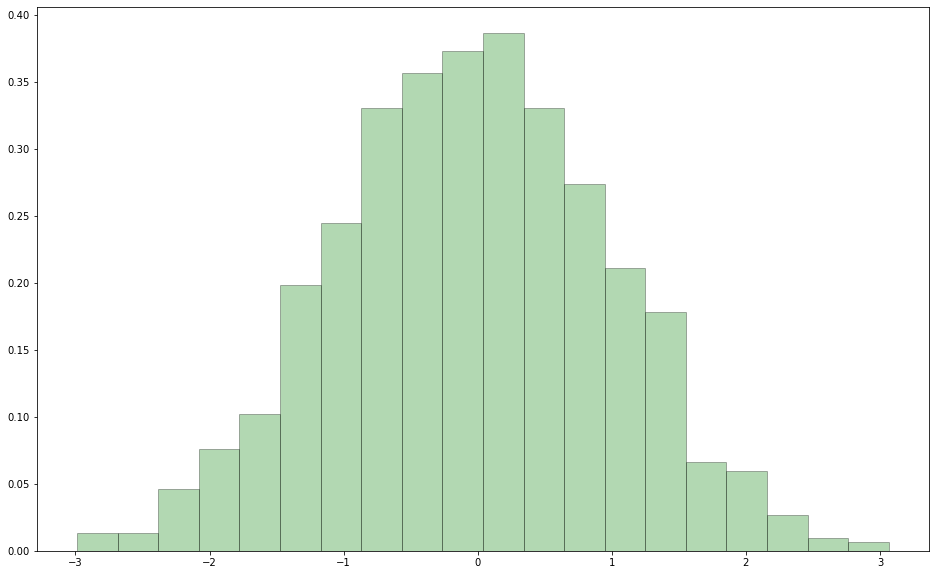

In [13]:
# Same plot, but with
#  * 20 bins
#  * alpha of 0.6
#  * Green bars
#  * Black lines around the bars
fig, ax = plt.subplots()
(n, bins, _) = ax.hist(
    np.random.randn(1000),
    bins=20,
    density=True,
    alpha=0.3,
    color='green',
    edgecolor='k'
)

Bar plots are similar to histograms, but where the columns in a histogram correspond to a continuous categorical variable, the columns in a bar chart can correspond to groups defined by non-continuous categorical. e.g. Age is continuous so you could do a histogram by age, but the faculties someone might belong to are discrete so a bar chart would be best.

In the example below we've jumped straight into adding a bunch of keywords. We've manually created a stacked bar plot by setting the `bottom=` keyword on the second call so that the orange bars start at the top of the corresponding blue bar.

<BarContainer object of 5 artists>

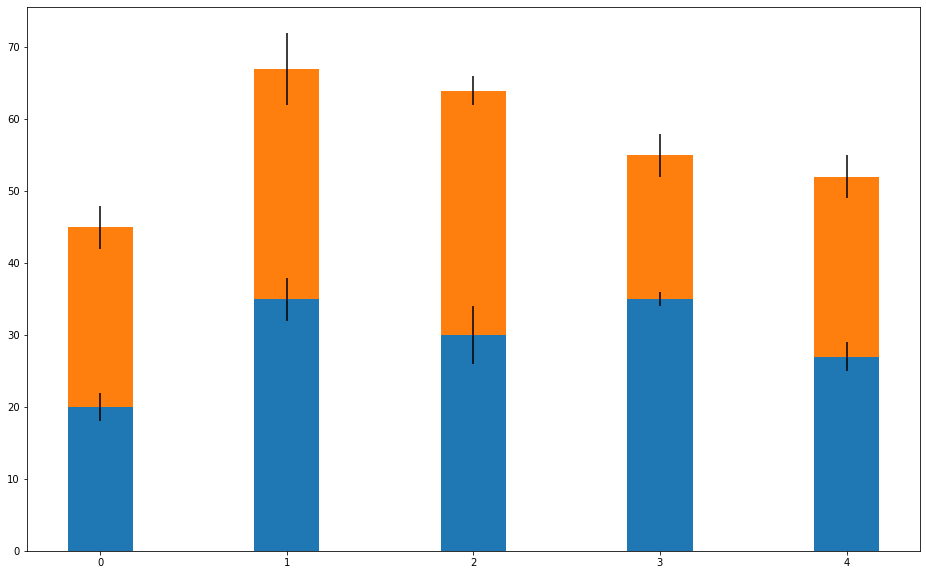

In [14]:
N = 5
mMeans = (20, 35, 30, 35, 27)
wMeans = (25, 32, 34, 20, 25)
mStd = (2, 3, 4, 1, 2)
wStd = (3, 5, 2, 3, 3)

fig, ax = plt.subplots(1)
ax.bar(np.arange(N), mMeans, width=0.35, yerr = mStd)
ax.bar(np.arange(N), wMeans, bottom=mMeans, width=0.35, yerr = wStd)

There's a `barh` method for doing the same thing horizontally.

In `2D` there is still a useful notion of the histogram

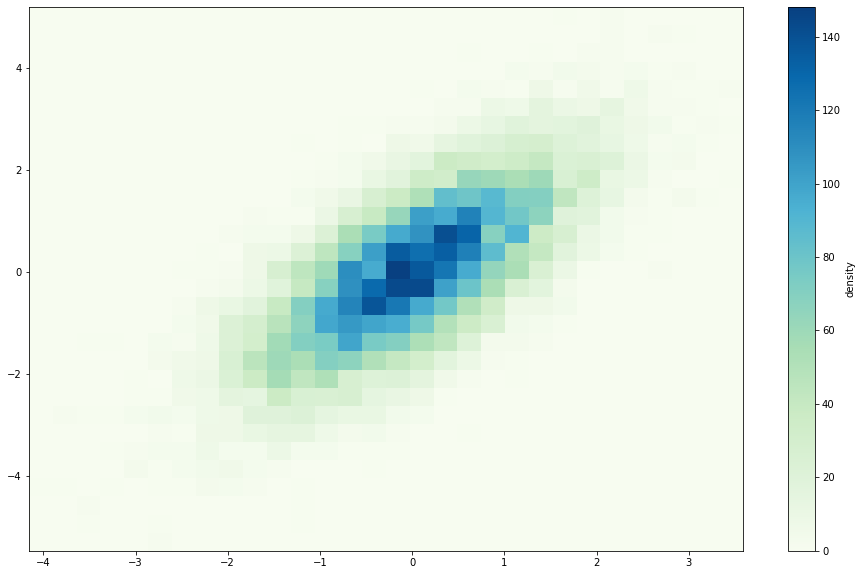

In [15]:
fig, ax = plt.subplots(1)

x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 2]], 10000).T
(_, _, _, h2) = ax.hist2d(x, y, bins=30, cmap='GnBu')
cb = fig.colorbar(h2, ax=ax)
cb.set_label('density')

### Contour plots

Countour plots don't come up very often, but I like them so...


In [16]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
    
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

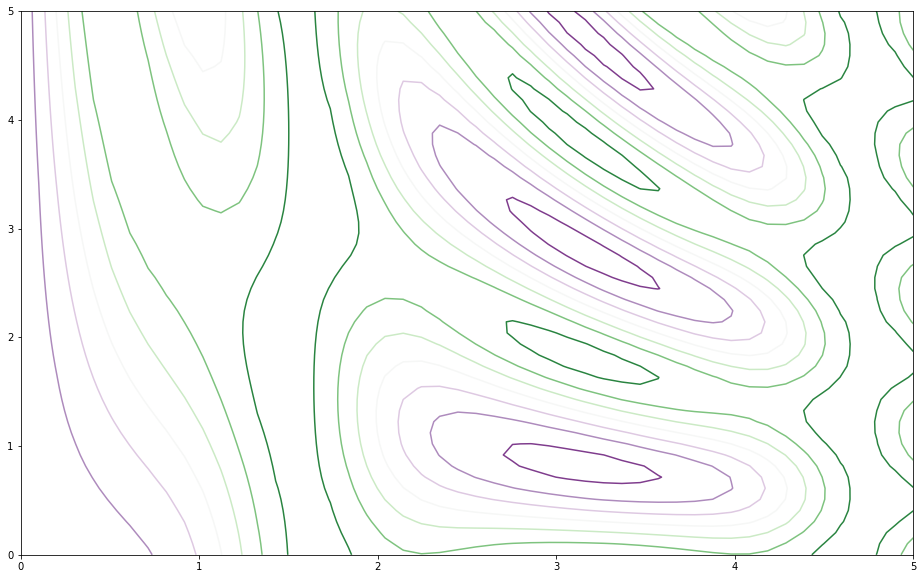

In [17]:
fig, ax = plt.subplots(1)
ax.contour(X, Y, Z, cmap='PRGn')

There is a `contourf` method which will fill in the spaces between the contours.


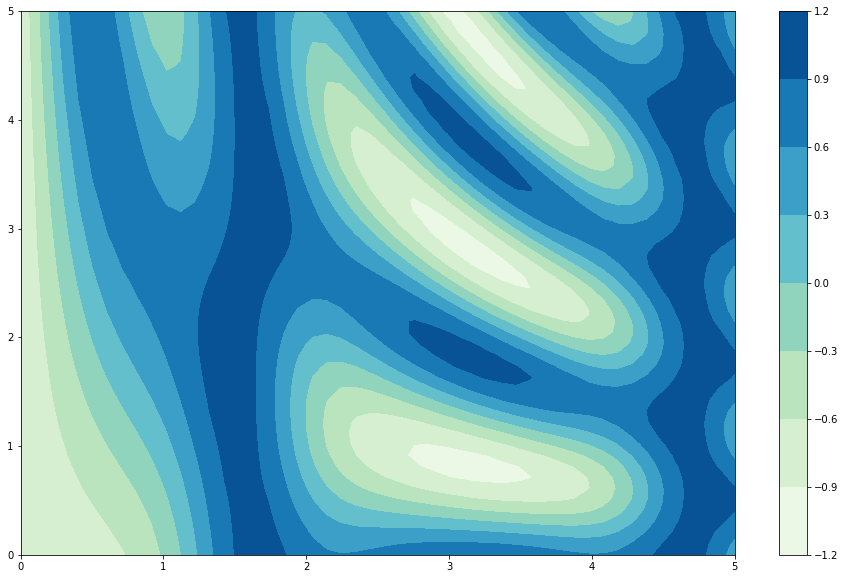

In [18]:
fig, ax = plt.subplots(1)
cf = ax.contourf(X, Y, Z, cmap='GnBu')
fig.colorbar(cf, ax = ax)

## Subplots

For publications and reports you might want to have multiple plots next to each other, this is where `plt.subplots()` becomes more than boilerplate...

Text(0, 0.5, 'Deviation')

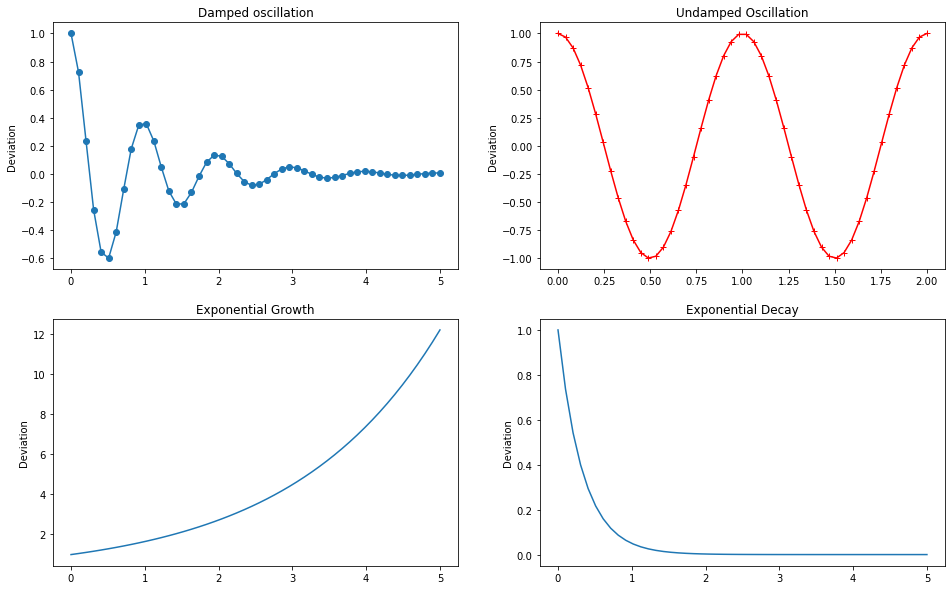

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2)

x1 = np.linspace(0., 5.)
x2 = np.linspace(0., 2.)

y1 = np.cos(2*np.pi * x1) * np.exp(-x1)
y2 = np.cos(2*np.pi * x2)

ax[0,0].plot(x1, y1, 'o-')
ax[0,0].set_title('Damped oscillation')
ax[0,0].set_ylabel('Deviation')

ax[0,1].plot(x2, y2, '+-', color='red')
ax[0,1].set_title('Undamped Oscillation')
ax[0,1].set_ylabel('Deviation')

ax[1,0].plot(x1, np.exp(0.5*x1))
ax[1,0].set_title('Exponential Growth')
ax[1,0].set_ylabel('Deviation')

ax[1,1].plot(x1, np.exp(-3*x1))
ax[1,1].set_title('Exponential Decay')
ax[1,1].set_ylabel('Deviation')


If you need some inspiration, you can find some useful examples in [this gallery](https://matplotlib.org/stable/gallery/index.html). There is also a whole language of annotations and patches for marking up your plots to highligh features etc.

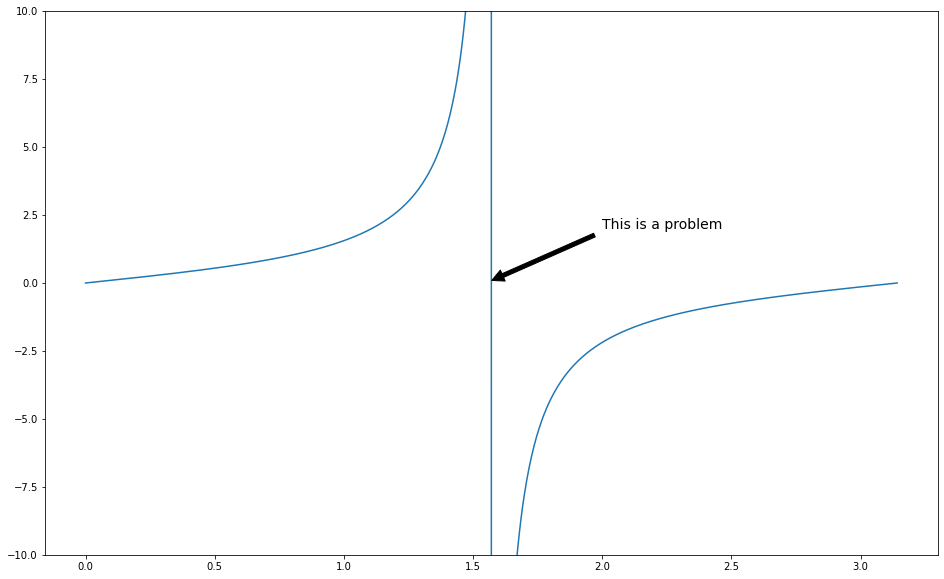

In [23]:
x = np.linspace(0, np.pi, 1000)
y = np.tan(x)

fig, ax = plt.subplots(1)
ax.plot(x, y)
ax.set_ylim(-10,10)

_ = ax.annotate("This is a problem", 
            xy=(1.55,0), # Coordinate locating the arrow 
            xytext=(2,2), # Location of the text
            arrowprops={'facecolor': 'k', 'shrink': 0.05},
            size=14
           )

## Style

Matplotlib has a distinctive style, thankfully they let you specify stylesheets to change things up a bit. Take a look at `plt.style.available` and try out some alternatives. You can try them out with the context system (`with` keyword) - this tidies up the context when you are done and avoids restyling your work above.

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

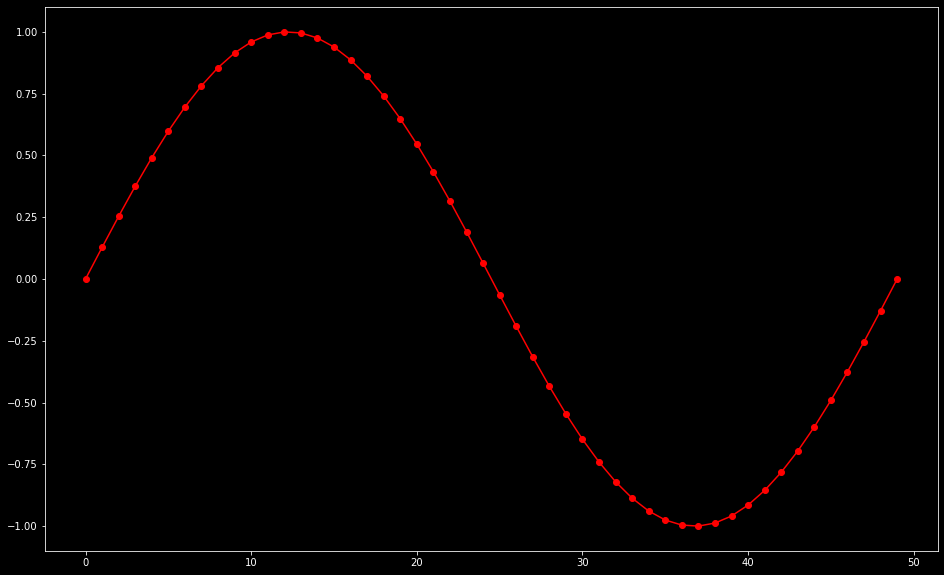

In [22]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

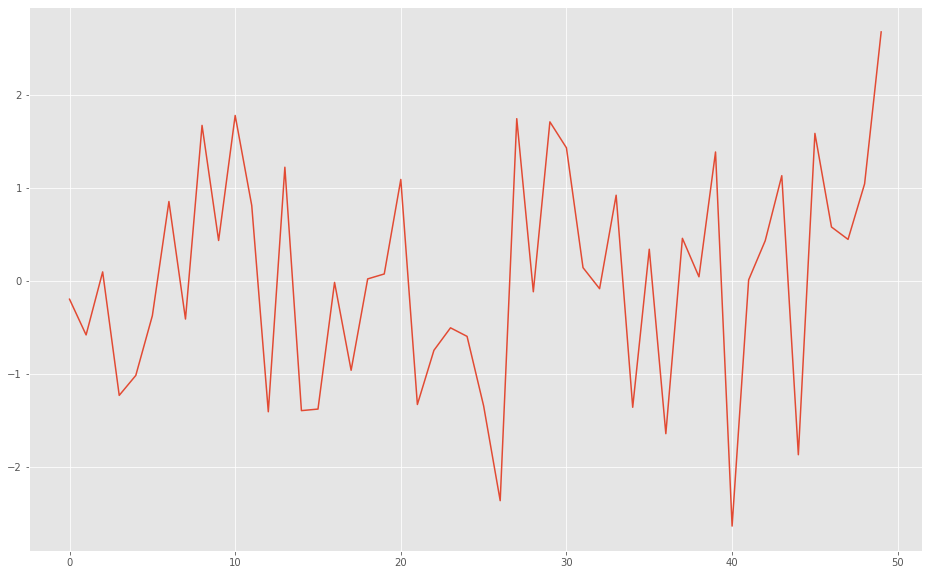

In [24]:
from cycler import cycler
plt.style.use('ggplot')
data = np.random.randn(50)

fix, ax = plt.subplots()
ax.plot(data)

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. At a very basic level it picks some nicer matplotlib defaults

### BoxPlots

Boxplots can show you the distribution of your data and highligh possible outliers. It calculates quartiles for your data and uses those to determine values it thinks are outliers. It then displays the quartiles as boxes and whiskers and the outliers as dots

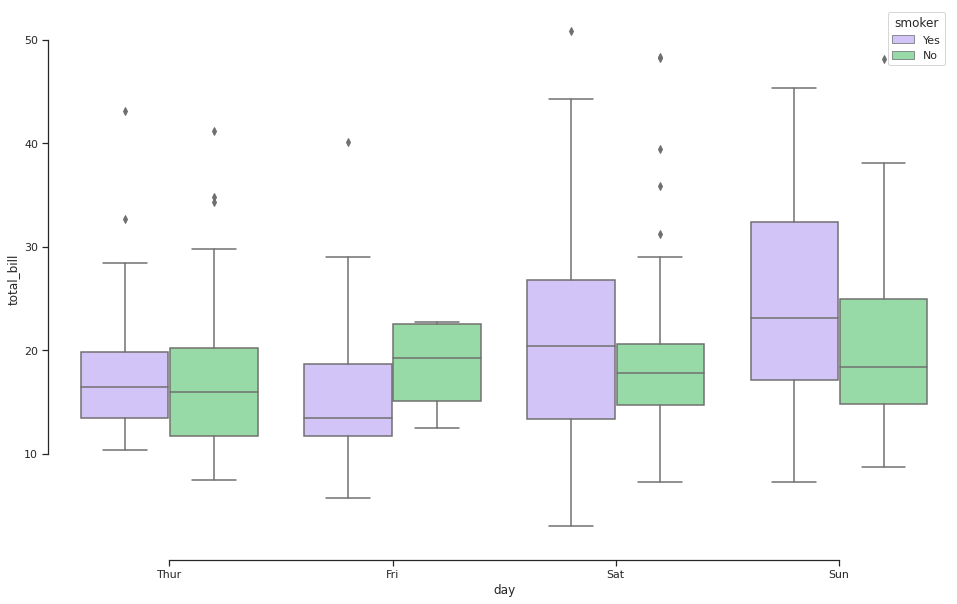

In [25]:
import seaborn as sns

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

### Histograms

`sns.histplot` can plot histograms similar to `plt.hist` but prettier and with a few extra features.

In [26]:
penguins = sns.load_dataset("penguins")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

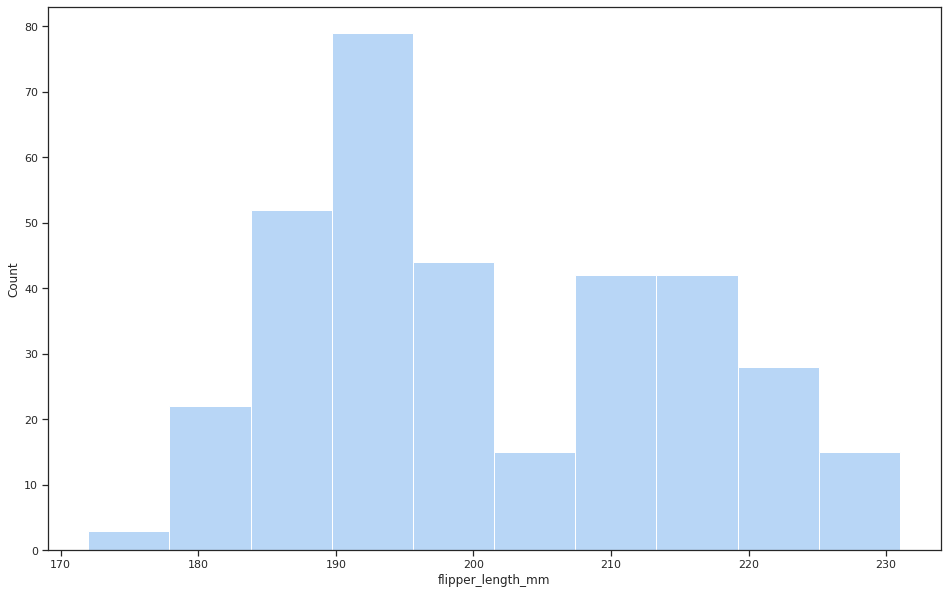

In [27]:
sns.histplot(data=penguins, x="flipper_length_mm")

The `kde` keyword argument will compute a kernel density estimate for the data and display it as a line on top of your histogram.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

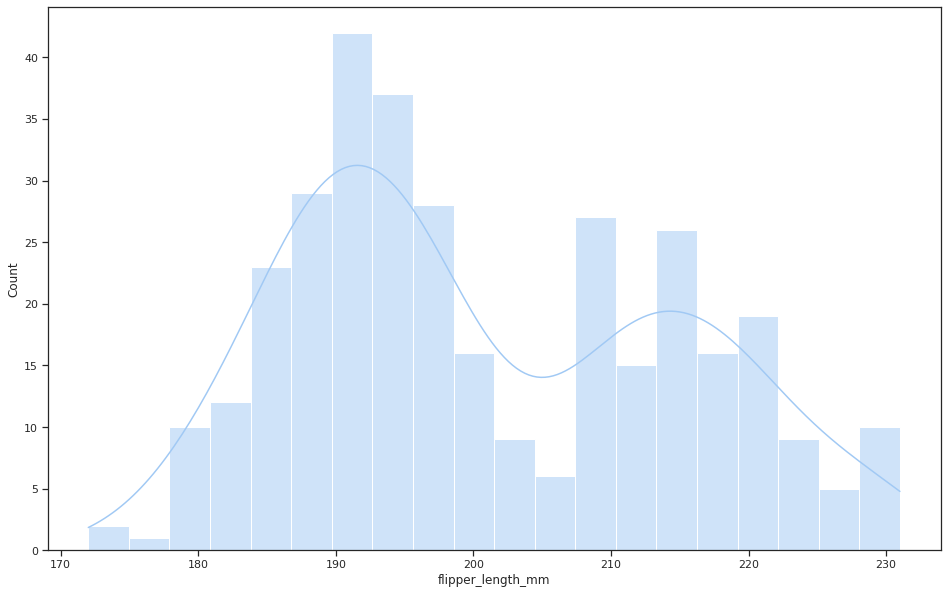

In [28]:
sns.histplot(penguins['flipper_length_mm'], bins=20, kde=True)

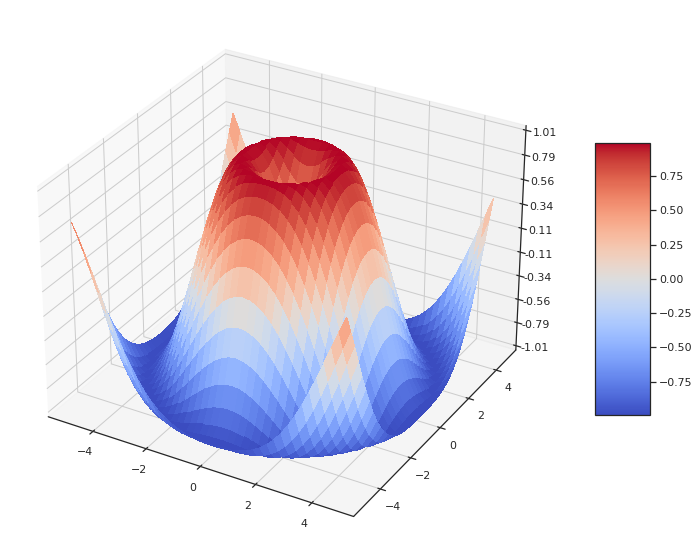

In [30]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()